In [11]:
import numpy as np
import scipy
import scipy.stats as st
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

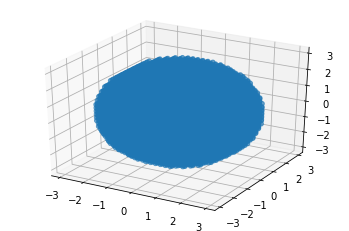

In [5]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
z = np.linspace(-10, 10, 100)
xx, yy, zz = np.meshgrid(x, y, z)

def sphere(xx, yy, zz):
    label = np.zeros(xx.shape)
    label[xx**2 + yy **2 + zz**2 < 3**2] = True
    return label
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
label = sphere(xx, yy, zz)
ax.scatter(xx*label, yy*label, zz*label)

In [13]:
N = 100000
alpha = 0.01
X = np.random.uniform(-10, 10, (4, N))
X[3,:] = 1
Y = X[0,:]**2+X[1,:]**2+X[2,:]**2<3**2
Y = sphere(X[0], X[1], X[2])
Y = Y*2-1

X = torch.Tensor(X)
Y = torch.Tensor(Y.astype(int))

In [14]:
class ShallowSDF(nn.Module):
    def __init__(self):
        super(ShallowSDF, self).__init__()
        self.fc1 = nn.Linear(4, 1, bias = False)
    def forward(self, X):
        return self.fc1(X)

net = ShallowSDF()

optimizer = optim.SGD(net.parameters(), lr=alpha)
optimizer.zero_grad()

for iter in range(10000):
    Fx = net(torch.transpose(X, 0, 1)).squeeze()
    loss = nn.BCEWithLogitsLoss()(Fx, Y)
    loss.backward()
    print("Loss: %f" %loss)
    optimizer.step()
    optimizer.zero_grad()

Loss: 0.966336
Loss: 0.901956
Loss: 0.838273
Loss: 0.775337
Loss: 0.713200
Loss: 0.651917
Loss: 0.591549
Loss: 0.532157
Loss: 0.473807
Loss: 0.416567
Loss: 0.360509
Loss: 0.305705
Loss: 0.252227
Loss: 0.200148
Loss: 0.149541
Loss: 0.100471
Loss: 0.053002
Loss: 0.007189
Loss: -0.036923
Loss: -0.079297
Loss: -0.119914
Loss: -0.158765
Loss: -0.195860
Loss: -0.231224
Loss: -0.264897
Loss: -0.296935
Loss: -0.327407
Loss: -0.356395
Loss: -0.383986
Loss: -0.410276
Loss: -0.435363
Loss: -0.459346
Loss: -0.482323
Loss: -0.504387
Loss: -0.525628
Loss: -0.546130
Loss: -0.565970
Loss: -0.585219
Loss: -0.603940
Loss: -0.622192
Loss: -0.640025
Loss: -0.657486
Loss: -0.674615
Loss: -0.691447
Loss: -0.708015
Loss: -0.724345
Loss: -0.740461
Loss: -0.756385
Loss: -0.772135
Loss: -0.787727
Loss: -0.803174
Loss: -0.818490
Loss: -0.833684
Loss: -0.848766
Loss: -0.863744
Loss: -0.878625
Loss: -0.893416
Loss: -0.908121
Loss: -0.922746
Loss: -0.937295
Loss: -0.951772
Loss: -0.966180
Loss: -0.980521
Loss: -0.9

Loss: -7.234244
Loss: -7.243689
Loss: -7.253133
Loss: -7.262578
Loss: -7.272022
Loss: -7.281466
Loss: -7.290909
Loss: -7.300354
Loss: -7.309797
Loss: -7.319242
Loss: -7.328686
Loss: -7.338130
Loss: -7.347573
Loss: -7.357016
Loss: -7.366458
Loss: -7.375903
Loss: -7.385345
Loss: -7.394787
Loss: -7.404233
Loss: -7.413674
Loss: -7.423117
Loss: -7.432560
Loss: -7.442002
Loss: -7.451446
Loss: -7.460886
Loss: -7.470329
Loss: -7.479771
Loss: -7.489213
Loss: -7.498655
Loss: -7.508098
Loss: -7.517540
Loss: -7.526981
Loss: -7.536423
Loss: -7.545863
Loss: -7.555306
Loss: -7.564747
Loss: -7.574189
Loss: -7.583630
Loss: -7.593071
Loss: -7.602512
Loss: -7.611952
Loss: -7.621395
Loss: -7.630836
Loss: -7.640275
Loss: -7.649717
Loss: -7.659157
Loss: -7.668598
Loss: -7.678038
Loss: -7.687478
Loss: -7.696920
Loss: -7.706361
Loss: -7.715801
Loss: -7.725241
Loss: -7.734681
Loss: -7.744121
Loss: -7.753561
Loss: -7.763001
Loss: -7.772440
Loss: -7.781879
Loss: -7.791319
Loss: -7.800759
Loss: -7.810199
Loss: -7

Loss: -13.998874
Loss: -14.008305
Loss: -14.017740
Loss: -14.027171
Loss: -14.036603
Loss: -14.046038
Loss: -14.055470
Loss: -14.064902
Loss: -14.074335
Loss: -14.083769
Loss: -14.093200
Loss: -14.102635
Loss: -14.112067
Loss: -14.121499
Loss: -14.130933
Loss: -14.140365
Loss: -14.149797
Loss: -14.159231
Loss: -14.168662
Loss: -14.178095
Loss: -14.187529
Loss: -14.196961
Loss: -14.206392
Loss: -14.215828
Loss: -14.225258
Loss: -14.234693
Loss: -14.244125
Loss: -14.253557
Loss: -14.262990
Loss: -14.272424
Loss: -14.281857
Loss: -14.291288
Loss: -14.300720
Loss: -14.310154
Loss: -14.319586
Loss: -14.329020
Loss: -14.338451
Loss: -14.347885
Loss: -14.357318
Loss: -14.366749
Loss: -14.376183
Loss: -14.385617
Loss: -14.395047
Loss: -14.404483
Loss: -14.413914
Loss: -14.423347
Loss: -14.432780
Loss: -14.442214
Loss: -14.451642
Loss: -14.461079
Loss: -14.470510
Loss: -14.479943
Loss: -14.489378
Loss: -14.498806
Loss: -14.508242
Loss: -14.517675
Loss: -14.527107
Loss: -14.536540
Loss: -14.5459

Loss: -20.507462
Loss: -20.516893
Loss: -20.526327
Loss: -20.535765
Loss: -20.545195
Loss: -20.554628
Loss: -20.564060
Loss: -20.573492
Loss: -20.582924
Loss: -20.592360
Loss: -20.601789
Loss: -20.611223
Loss: -20.620655
Loss: -20.630089
Loss: -20.639523
Loss: -20.648952
Loss: -20.658386
Loss: -20.667820
Loss: -20.677252
Loss: -20.686686
Loss: -20.696115
Loss: -20.705549
Loss: -20.714983
Loss: -20.724417
Loss: -20.733845
Loss: -20.743280
Loss: -20.752714
Loss: -20.762144
Loss: -20.771578
Loss: -20.781012
Loss: -20.790443
Loss: -20.799877
Loss: -20.809309
Loss: -20.818743
Loss: -20.828178
Loss: -20.837610
Loss: -20.847042
Loss: -20.856476
Loss: -20.865906
Loss: -20.875340
Loss: -20.884773
Loss: -20.894205
Loss: -20.903641
Loss: -20.913069
Loss: -20.922506
Loss: -20.931934
Loss: -20.941368
Loss: -20.950802
Loss: -20.960234
Loss: -20.969666
Loss: -20.979099
Loss: -20.988535
Loss: -20.997959
Loss: -21.007401
Loss: -21.016830
Loss: -21.026264
Loss: -21.035694
Loss: -21.045124
Loss: -21.0545

Loss: -25.657740
Loss: -25.667170
Loss: -25.676600
Loss: -25.686035
Loss: -25.695471
Loss: -25.704901
Loss: -25.714331
Loss: -25.723770
Loss: -25.733200
Loss: -25.742630
Loss: -25.752068
Loss: -25.761497
Loss: -25.770927
Loss: -25.780359
Loss: -25.789795
Loss: -25.799231
Loss: -25.808662
Loss: -25.818092
Loss: -25.827524
Loss: -25.836954
Loss: -25.846390
Loss: -25.855827
Loss: -25.865255
Loss: -25.874685
Loss: -25.884121
Loss: -25.893555
Loss: -25.902985
Loss: -25.912422
Loss: -25.921858
Loss: -25.931286
Loss: -25.940720
Loss: -25.950153
Loss: -25.959583
Loss: -25.969017
Loss: -25.978451
Loss: -25.987885
Loss: -25.997314
Loss: -26.006750
Loss: -26.016182
Loss: -26.025616
Loss: -26.035048
Loss: -26.044479
Loss: -26.053909
Loss: -26.063345
Loss: -26.072775
Loss: -26.082211
Loss: -26.091640
Loss: -26.101078
Loss: -26.110504
Loss: -26.119940
Loss: -26.129375
Loss: -26.138807
Loss: -26.148235
Loss: -26.157669
Loss: -26.167103
Loss: -26.176537
Loss: -26.185972
Loss: -26.195400
Loss: -26.2048

Loss: -32.345795
Loss: -32.355228
Loss: -32.364662
Loss: -32.374096
Loss: -32.383530
Loss: -32.392963
Loss: -32.402401
Loss: -32.411839
Loss: -32.421268
Loss: -32.430706
Loss: -32.440140
Loss: -32.449574
Loss: -32.459007
Loss: -32.468445
Loss: -32.477879
Loss: -32.487309
Loss: -32.496746
Loss: -32.506184
Loss: -32.515614
Loss: -32.525051
Loss: -32.534485
Loss: -32.543919
Loss: -32.553349
Loss: -32.562790
Loss: -32.572224
Loss: -32.581657
Loss: -32.591091
Loss: -32.600529
Loss: -32.609959
Loss: -32.619396
Loss: -32.628834
Loss: -32.638268
Loss: -32.647697
Loss: -32.657135
Loss: -32.666569
Loss: -32.676006
Loss: -32.685440
Loss: -32.694866
Loss: -32.704304
Loss: -32.713741
Loss: -32.723179
Loss: -32.732616
Loss: -32.742046
Loss: -32.751476
Loss: -32.760914
Loss: -32.770348
Loss: -32.779785
Loss: -32.789219
Loss: -32.798656
Loss: -32.808090
Loss: -32.817524
Loss: -32.826962
Loss: -32.836391
Loss: -32.845829
Loss: -32.855259
Loss: -32.864697
Loss: -32.874134
Loss: -32.883568
Loss: -32.8930

Loss: -39.063221
Loss: -39.072659
Loss: -39.082088
Loss: -39.091526
Loss: -39.100964
Loss: -39.110397
Loss: -39.119827
Loss: -39.129261
Loss: -39.138695
Loss: -39.148132
Loss: -39.157570
Loss: -39.167004
Loss: -39.176434
Loss: -39.185871
Loss: -39.195305
Loss: -39.204739
Loss: -39.214176
Loss: -39.223614
Loss: -39.233044
Loss: -39.242477
Loss: -39.251915
Loss: -39.261349
Loss: -39.270779
Loss: -39.280216
Loss: -39.289654
Loss: -39.299088
Loss: -39.308521
Loss: -39.317955
Loss: -39.327389
Loss: -39.336830
Loss: -39.346256
Loss: -39.355694
Loss: -39.365124
Loss: -39.374565
Loss: -39.383995
Loss: -39.393429
Loss: -39.402866
Loss: -39.412300
Loss: -39.421734
Loss: -39.431171
Loss: -39.440605
Loss: -39.450039
Loss: -39.459473
Loss: -39.468906
Loss: -39.478344
Loss: -39.487782
Loss: -39.497211
Loss: -39.506649
Loss: -39.516083
Loss: -39.525517
Loss: -39.534950
Loss: -39.544388
Loss: -39.553818
Loss: -39.563251
Loss: -39.572689
Loss: -39.582119
Loss: -39.591557
Loss: -39.600994
Loss: -39.6104

Loss: -45.705170
Loss: -45.714611
Loss: -45.724049
Loss: -45.733479
Loss: -45.742908
Loss: -45.752350
Loss: -45.761780
Loss: -45.771210
Loss: -45.780643
Loss: -45.790073
Loss: -45.799515
Loss: -45.808949
Loss: -45.818386
Loss: -45.827820
Loss: -45.837261
Loss: -45.846691
Loss: -45.856129
Loss: -45.865559
Loss: -45.874996
Loss: -45.884430
Loss: -45.893860
Loss: -45.903290
Loss: -45.912731
Loss: -45.922169
Loss: -45.931610
Loss: -45.941040
Loss: -45.950474
Loss: -45.959911
Loss: -45.969341
Loss: -45.978779
Loss: -45.988209
Loss: -45.997639
Loss: -46.007076
Loss: -46.016510
Loss: -46.025944
Loss: -46.035381
Loss: -46.044819
Loss: -46.054256
Loss: -46.063690
Loss: -46.073120
Loss: -46.082561
Loss: -46.091991
Loss: -46.101425
Loss: -46.110867
Loss: -46.120296
Loss: -46.129726
Loss: -46.139164
Loss: -46.148602
Loss: -46.158035
Loss: -46.167465
Loss: -46.176907
Loss: -46.186340
Loss: -46.195770
Loss: -46.205200
Loss: -46.214642
Loss: -46.224072
Loss: -46.233509
Loss: -46.242939
Loss: -46.2523

Loss: -52.328255
Loss: -52.337688
Loss: -52.347130
Loss: -52.356560
Loss: -52.365990
Loss: -52.375423
Loss: -52.384865
Loss: -52.394295
Loss: -52.403725
Loss: -52.413170
Loss: -52.422604
Loss: -52.432034
Loss: -52.441471
Loss: -52.450901
Loss: -52.460335
Loss: -52.469769
Loss: -52.479206
Loss: -52.488644
Loss: -52.498081
Loss: -52.507511
Loss: -52.516949
Loss: -52.526379
Loss: -52.535820
Loss: -52.545246
Loss: -52.554691
Loss: -52.564121
Loss: -52.573551
Loss: -52.582985
Loss: -52.592419
Loss: -52.601860
Loss: -52.611290
Loss: -52.620724
Loss: -52.630154
Loss: -52.639599
Loss: -52.649036
Loss: -52.658466
Loss: -52.667900
Loss: -52.677334
Loss: -52.686775
Loss: -52.696205
Loss: -52.705639
Loss: -52.715069
Loss: -52.724514
Loss: -52.733936
Loss: -52.743370
Loss: -52.752811
Loss: -52.762241
Loss: -52.771687
Loss: -52.781116
Loss: -52.790550
Loss: -52.799980
Loss: -52.809422
Loss: -52.818851
Loss: -52.828285
Loss: -52.837719
Loss: -52.847160
Loss: -52.856579
Loss: -52.866020
Loss: -52.8754

Loss: -58.904156
Loss: -58.913601
Loss: -58.923035
Loss: -58.932468
Loss: -58.941906
Loss: -58.951336
Loss: -58.960770
Loss: -58.970203
Loss: -58.979633
Loss: -58.989071
Loss: -58.998508
Loss: -59.007938
Loss: -59.017380
Loss: -59.026810
Loss: -59.036251
Loss: -59.045681
Loss: -59.055119
Loss: -59.064556
Loss: -59.073990
Loss: -59.083420
Loss: -59.092850
Loss: -59.102291
Loss: -59.111725
Loss: -59.121159
Loss: -59.130589
Loss: -59.140030
Loss: -59.149471
Loss: -59.158901
Loss: -59.168339
Loss: -59.177769
Loss: -59.187199
Loss: -59.196629
Loss: -59.206070
Loss: -59.215504
Loss: -59.224941
Loss: -59.234371
Loss: -59.243809
Loss: -59.253246
Loss: -59.262676
Loss: -59.272110
Loss: -59.281551
Loss: -59.290981
Loss: -59.300419
Loss: -59.309849
Loss: -59.319279
Loss: -59.328716
Loss: -59.338150
Loss: -59.347591
Loss: -59.357025
Loss: -59.366459
Loss: -59.375889
Loss: -59.385330
Loss: -59.394772
Loss: -59.404202
Loss: -59.413624
Loss: -59.423065
Loss: -59.432499
Loss: -59.441929
Loss: -59.4513

Loss: -65.263077
Loss: -65.272507
Loss: -65.281937
Loss: -65.291382
Loss: -65.300812
Loss: -65.310249
Loss: -65.319679
Loss: -65.329117
Loss: -65.338554
Loss: -65.347992
Loss: -65.357422
Loss: -65.366859
Loss: -65.376289
Loss: -65.385719
Loss: -65.395157
Loss: -65.404587
Loss: -65.414032
Loss: -65.423462
Loss: -65.432899
Loss: -65.442329
Loss: -65.451767
Loss: -65.461197
Loss: -65.470627
Loss: -65.480072
Loss: -65.489510
Loss: -65.498940
Loss: -65.508377
Loss: -65.517807
Loss: -65.527245
Loss: -65.536682
Loss: -65.546120
Loss: -65.555542
Loss: -65.564987
Loss: -65.574417
Loss: -65.583855
Loss: -65.593285
Loss: -65.602722
Loss: -65.612152
Loss: -65.621597
Loss: -65.631027
Loss: -65.640457
Loss: -65.649895
Loss: -65.659332
Loss: -65.668770
Loss: -65.678200
Loss: -65.687637
Loss: -65.697060
Loss: -65.706497
Loss: -65.715935
Loss: -65.725372
Loss: -65.734802
Loss: -65.744240
Loss: -65.753677
Loss: -65.763107
Loss: -65.772545
Loss: -65.781982
Loss: -65.791412
Loss: -65.800850
Loss: -65.8102

Loss: -71.433296
Loss: -71.442734
Loss: -71.452164
Loss: -71.461594
Loss: -71.471031
Loss: -71.480469
Loss: -71.489899
Loss: -71.499336
Loss: -71.508774
Loss: -71.518211
Loss: -71.527649
Loss: -71.537079
Loss: -71.546509
Loss: -71.555946
Loss: -71.565376
Loss: -71.574814
Loss: -71.584251
Loss: -71.593681
Loss: -71.603119
Loss: -71.612549
Loss: -71.621986
Loss: -71.631424
Loss: -71.640862
Loss: -71.650291
Loss: -71.659729
Loss: -71.669167
Loss: -71.678604
Loss: -71.688042
Loss: -71.697464
Loss: -71.706894
Loss: -71.716331
Loss: -71.725761
Loss: -71.735199
Loss: -71.744637
Loss: -71.754059
Loss: -71.763496
Loss: -71.772942
Loss: -71.782379
Loss: -71.791817
Loss: -71.801247
Loss: -71.810692
Loss: -71.820122
Loss: -71.829552
Loss: -71.838982
Loss: -71.848419
Loss: -71.857849
Loss: -71.867279
Loss: -71.876717
Loss: -71.886147
Loss: -71.895592
Loss: -71.905029
Loss: -71.914452
Loss: -71.923897
Loss: -71.933327
Loss: -71.942764
Loss: -71.952194
Loss: -71.961632
Loss: -71.971069
Loss: -71.9805

Loss: -76.367592
Loss: -76.377022
Loss: -76.386459
Loss: -76.395897
Loss: -76.405327
Loss: -76.414772
Loss: -76.424202
Loss: -76.433624
Loss: -76.443062
Loss: -76.452499
Loss: -76.461929
Loss: -76.471382
Loss: -76.480797
Loss: -76.490234
Loss: -76.499672
Loss: -76.509102
Loss: -76.518539
Loss: -76.527969
Loss: -76.537407
Loss: -76.546837
Loss: -76.556267
Loss: -76.565712
Loss: -76.575142
Loss: -76.584587
Loss: -76.594017
Loss: -76.603447
Loss: -76.612877
Loss: -76.622322
Loss: -76.631752
Loss: -76.641182
Loss: -76.650620
Loss: -76.660065
Loss: -76.669495
Loss: -76.678925
Loss: -76.688362
Loss: -76.697792
Loss: -76.707230
Loss: -76.716667
Loss: -76.726097
Loss: -76.735535
Loss: -76.744972
Loss: -76.754402
Loss: -76.763840
Loss: -76.773277
Loss: -76.782707
Loss: -76.792137
Loss: -76.801582
Loss: -76.811012
Loss: -76.820442
Loss: -76.829872
Loss: -76.839317
Loss: -76.848747
Loss: -76.858192
Loss: -76.867622
Loss: -76.877052
Loss: -76.886497
Loss: -76.895927
Loss: -76.905357
Loss: -76.9148

Loss: -81.396217
Loss: -81.405663
Loss: -81.415092
Loss: -81.424522
Loss: -81.433960
Loss: -81.443398
Loss: -81.452827
Loss: -81.462265
Loss: -81.471703
Loss: -81.481133
Loss: -81.490562
Loss: -81.500008
Loss: -81.509445
Loss: -81.518883
Loss: -81.528313
Loss: -81.537743
Loss: -81.547180
Loss: -81.556610
Loss: -81.566032
Loss: -81.575478
Loss: -81.584915
Loss: -81.594353
Loss: -81.603783
Loss: -81.613220
Loss: -81.622650
Loss: -81.632103
Loss: -81.641518
Loss: -81.650963
Loss: -81.660393
Loss: -81.669838
Loss: -81.679260
Loss: -81.688690
Loss: -81.698128
Loss: -81.707573
Loss: -81.717003
Loss: -81.726433
Loss: -81.735863
Loss: -81.745308
Loss: -81.754730
Loss: -81.764168
Loss: -81.773613
Loss: -81.783043
Loss: -81.792473
Loss: -81.801910
Loss: -81.811348
Loss: -81.820786
Loss: -81.830223
Loss: -81.839645
Loss: -81.849083
Loss: -81.858521
Loss: -81.867958
Loss: -81.877380
Loss: -81.886818
Loss: -81.896255
Loss: -81.905701
Loss: -81.915131
Loss: -81.924561
Loss: -81.933998
Loss: -81.9434

Loss: -86.104080
Loss: -86.113503
Loss: -86.122940
Loss: -86.132378
Loss: -86.141823
Loss: -86.151260
Loss: -86.160698
Loss: -86.170120
Loss: -86.179550
Loss: -86.188980
Loss: -86.198433
Loss: -86.207848
Loss: -86.217293
Loss: -86.226738
Loss: -86.236183
Loss: -86.245613
Loss: -86.255043
Loss: -86.264473
Loss: -86.273918
Loss: -86.283340
Loss: -86.292770
Loss: -86.302208
Loss: -86.311638
Loss: -86.321068
Loss: -86.330498
Loss: -86.339943
Loss: -86.349380
Loss: -86.358818
Loss: -86.368248
Loss: -86.377678
Loss: -86.387123
Loss: -86.396561
Loss: -86.405983
Loss: -86.415421
Loss: -86.424850
Loss: -86.434288
Loss: -86.443718
Loss: -86.453163
Loss: -86.462601
Loss: -86.472038
Loss: -86.481483
Loss: -86.490898
Loss: -86.500343
Loss: -86.509781
Loss: -86.519211
Loss: -86.528641
Loss: -86.538078
Loss: -86.547501
Loss: -86.556938
Loss: -86.566368
Loss: -86.575798
Loss: -86.585251
Loss: -86.594681
Loss: -86.604111
Loss: -86.613541
Loss: -86.622993
Loss: -86.632423
Loss: -86.641861
Loss: -86.6512

Loss: -91.302544
Loss: -91.311989
Loss: -91.321419
Loss: -91.330849
Loss: -91.340279
Loss: -91.349716
Loss: -91.359138
Loss: -91.368584
Loss: -91.378014
Loss: -91.387459
Loss: -91.396881
Loss: -91.406319
Loss: -91.415749
Loss: -91.425194
Loss: -91.434624
Loss: -91.444054
Loss: -91.453491
Loss: -91.462921
Loss: -91.472359
Loss: -91.481796
Loss: -91.491226
Loss: -91.500664
Loss: -91.510101
Loss: -91.519539
Loss: -91.528976
Loss: -91.538406
Loss: -91.547859
Loss: -91.557281
Loss: -91.566711
Loss: -91.576149
Loss: -91.585579
Loss: -91.595001
Loss: -91.604462
Loss: -91.613876
Loss: -91.623306
Loss: -91.632751
Loss: -91.642174
Loss: -91.651619
Loss: -91.661049
Loss: -91.670479
Loss: -91.679916
Loss: -91.689362
Loss: -91.698792
Loss: -91.708229
Loss: -91.717651
Loss: -91.727081
Loss: -91.736526
Loss: -91.745972
Loss: -91.755409
Loss: -91.764839
Loss: -91.774277
Loss: -91.783707
Loss: -91.793137
Loss: -91.802582
Loss: -91.812012
Loss: -91.821449
Loss: -91.830872
Loss: -91.840309
Loss: -91.8497

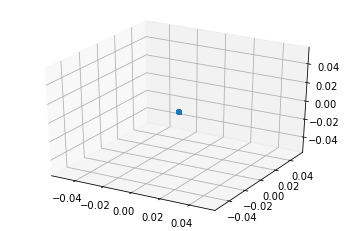

In [15]:
label = net(torch.Tensor(np.stack((xx.flatten(), yy.flatten(), zz.flatten(), np.ones(xx.flatten().shape)))).T)
label = label.detach().numpy().reshape((100, 100, 100))
label[label<=0] = 0
label[label>0] = 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xx*label, yy*label, zz*label)

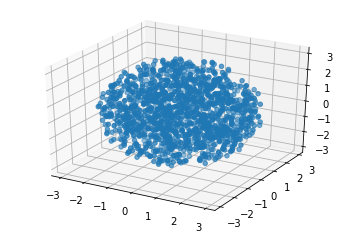

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Y = (Y + 1)/2
ax.scatter(X[0]*Y, X[1]*Y, X[2]*Y)